In [371]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [466]:
df = pd.read_csv("fertility_Diagnosis.csv",names=["Season","Age","Child_diseases","AORS","Surgery","fever_in_lastyear","Smoking","hours","output"])
df.insert(0,"Ones",1)

##### Data Set Information:

Provide all relevant information about your data set.


##### Attribute Information:

Season in which the analysis was performed. 1) winter, 2) spring, 3) Summer, 4) fall. (-1, -0.33, 0.33, 1) 

Age at the time of analysis. 18-36 (0, 1) 

Childish diseases (ie , chicken pox, measles, mumps, polio)	1) yes, 2) no. (0, 1) 

Accident or serious trauma 1) yes, 2) no. (0, 1) 

Surgical intervention 1) yes, 2) no. (0, 1) 

High fevers in the last year 1) less than three months ago, 2) more than three months ago, 3) no. (-1, 0, 1) 

Frequency of alcohol consumption 1) several times a day, 2) every day, 3) several times a week, 4) once a week, 5) hardly ever or never (0, 1) 

Smoking habit 1) never, 2) occasional 3) daily. (-1, 0, 1) 

Number of hours spent sitting per day ene-16	(0, 1) 

Output: Diagnosis	normal (N), altered (O)	

In [467]:
df.head()

,Ones,Season,Age,Child_diseases,AORS,Surgery,fever_in_lastyear,Smoking,hours,output
-0.33,1,0.69,0,1,1,0,0.8,0,0.88,N
-0.33,1,0.94,1,0,1,0,0.8,1,0.31,O
-0.33,1,0.50,1,0,0,0,1.0,-1,0.50,N
-0.33,1,0.75,0,1,1,0,1.0,-1,0.38,N
-0.33,1,0.67,1,1,0,0,0.8,-1,0.50,O


In [469]:
from sklearn.preprocessing import LabelEncoder
le_df=LabelEncoder()
df["output"]=le_df.fit_transform(df["output"])

In [470]:
df.isnull().sum()

Ones                 0
Season               0
Age                  0
Child_diseases       0
AORS                 0
Surgery              0
fever_in_lastyear    0
Smoking              0
hours                0
output               0
dtype: int64

In [471]:
df.shape

(100, 10)

In [473]:
df.corr()

,Ones,Season,Age,Child_diseases,AORS,Surgery,fever_in_lastyear,Smoking,hours,output
Ones,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Season,NaN,1.000000,0.080551,0.215958,0.271945,0.120284,-0.247940,0.072581,-0.442452,0.115229
Age,NaN,0.080551,1.000000,0.162936,-0.140972,0.075645,0.038538,0.090535,-0.147761,-0.040261
Child_diseases,NaN,0.215958,0.162936,1.000000,0.103166,-0.082278,-0.242722,0.110157,0.013122,-0.141346
AORS,NaN,0.271945,-0.140972,0.103166,1.000000,-0.231598,-0.075858,-0.053448,-0.192726,0.054171
Surgery,NaN,0.120284,0.075645,-0.082278,-0.231598,1.000000,-0.000831,-0.007527,-0.151091,-0.121421
fever_in_lastyear,NaN,-0.247940,0.038538,-0.242722,-0.075858,-0.000831,1.000000,-0.184926,0.111371,-0.144760
Smoking,NaN,0.072581,0.090535,0.110157,-0.053448,-0.007527,-0.184926,1.000000,-0.106007,0.045891
hours,NaN,-0.442452,-0.147761,0.013122,-0.192726,-0.151091,0.111371,-0.106007,1.000000,0.022964
output,NaN,0.115229,-0.040261,-0.141346,0.054171,-0.121421,-0.144760,0.045891,0.022964,1.000000


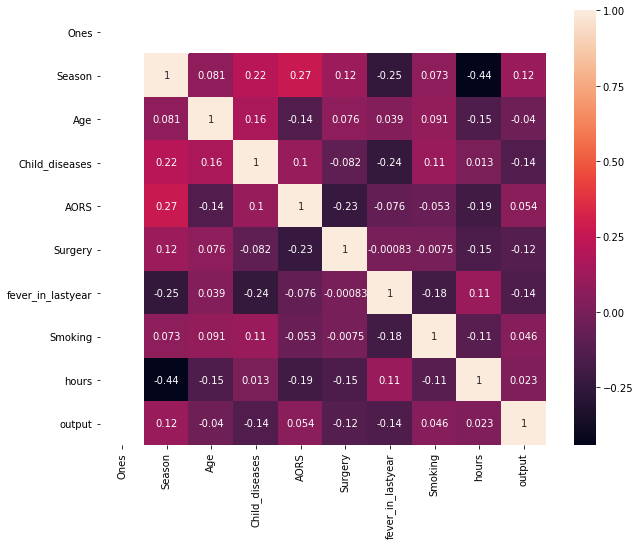

In [474]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

#### Allocating attributes and lables for the data

In [ ]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

#### Training ,Testing and Splitting our data

In [502]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30)

#### converting  x_train,y_train values to numpy array

In [503]:
X=np.array(x_train.values)
Y=np.array(y_train.values)

#### For this data i am using Logistic Regression 
#### for this data thier is no need of standar scalar beacuse all data points in the dataset are ranges in between 0 to 1

In [504]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

##### training our model with x_train,y_train data

In [505]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [506]:
y_predict=model.predict(x_test)
y_test=np.array(y_test)

##### Accuracy of the model

In [574]:
c=0
for i in range(len(y_predict)):
    
    if y_test[i]==y_predict[i]:
        c=c+1
print("accuracy:",c*100/len(y_predict))


accuracy: 90.0


#### Confusion matrix of our model

In [508]:
from sklearn.metrics import confusion_matrix
c=confusion_matrix(y_test,y_predict)

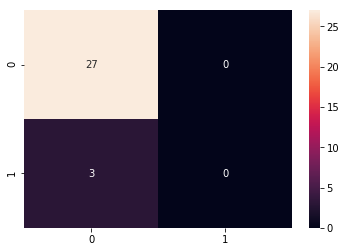

In [509]:
sns.heatmap(c,annot=True)

#### Logistic Regression From Scratch

#### converting x_train,y_train values in matrix form 

In [667]:
X=np.matrix(np.array(x_train.values))
Y=np.matrix(np.array(y_train.values))
X.shape,Y.shape

((70, 9), (1, 70))

#### Parameters which we are assuming as theta parameters taken based on number of attributes in x_train

In [ ]:
theta=np.matrix(np.zeros(x_train.shape[1]))

#### Sigmoid Function

In [512]:
def sigmoid(X,theta):
        z=X*theta.T
        return 1/(1+np.exp(-z))

#### CostFunction : helps to find the best parameters

In [661]:
def CostFunction(X,Y,theta):
    m=X.shape[0]
    t=sigmoid(X,theta)
    total_cost=-np.sum(np.multiply(Y,np.log(t))+np.multiply((1-Y),np.log(1-t)))/len(Y)
    return total_cost

In [662]:
CostFunction(X,Y,theta)

3396.421184743732

#### Gradient Descent :  decreases the cost function

In [663]:
def GradientDescent(X,Y,theta,iters,alpha):
    temp=np.matrix(np.zeros(theta.shape[1]))
    m=len(X)
    parameters=int(theta.shape[1])
    cost=np.zeros(iters)
    for i in range(iters):
        error=(sigmoid(X,theta)-Y)
        for j in range(parameters):
            term=np.multiply(error,X[:,j])
            temp[:,j]=temp[:,j]-((alpha/m)*np.sum(term))
        theta=temp
        cost[i]=CostFunction(X,Y,theta)
        
    return theta,cost
        
    

In [664]:
alpha=0.02
iters=400
t,c=GradientDescent(X,Y,theta,iters,alpha)

In [665]:
CostFunction(X,Y,t)

1881.3129639352028

#### here i have taken 400 iteration you can observe clearly how the cost function is decreasing for every iteration

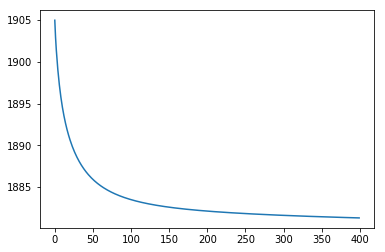

In [657]:
plt.plot(np.arange(iters),c)

#### Predict the x_test values

In [658]:
def predicted(x_test,t):
    predict=sigmoid(x_test,t)
    
    return [1 if x>0.5 else 0 for x in predict]

In [659]:
x_test=np.matrix(np.array(x_test))
y_predict=predicted(x_test,t)

#### Below you can find accuracy of our model

In [660]:
c1=0
for i in range(len(y_predict)):
    
    if y_test[i]==y_predict[i]:
        c1=c1+1
print("accuracy:",c1*100/len(y_predict))

accuracy: 90.0


In [673]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)*100

90.0

In [668]:
from sklearn.metrics import confusion_matrix
c=confusion_matrix(y_test,y_predict)

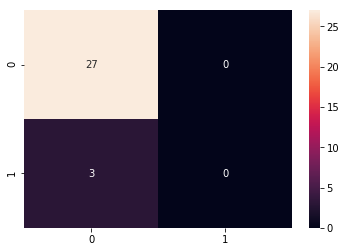

In [670]:
sns.heatmap(c,annot=True)